In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load the dataset into dataframe
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
# Quick Overview of Dataset
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Introduction
In today’s highly competitive business environment, employee retention is not just a human resources challenge—it is a strategic imperative. Organizations increasingly face the issue of employee attrition, which refers to the voluntary or involuntary loss of employees over time. High attrition rates can disrupt organizational stability, inflate recruitment and training costs, erode team cohesion, and lead to a loss of institutional knowledge—ultimately impacting productivity and profitability.

To build a resilient and high-performing workforce, it is essential for businesses to understand why employees leave and identify actionable insights that can shape effective retention strategies. This analysis focuses on uncovering the root causes of attrition and highlighting areas for HR policy improvement and employee engagement optimization.

** Objectives of the Analysis
1.Quantify and Understand Turnover Trends
Analyze the overall employee attrition rate and its breakdown across key demographic variables such as age group, gender, education level, department, and job role. This helps pinpoint where attrition is most concentrated and which segments are at highest risk.

2.Identify Drivers of Attrition
Use statistical and visual analysis to examine key factors associated with higher turnover, including:

.Job satisfaction metrics: job involvement, work-life balance, and performance rating

.Compensation and rewards: monthly income, salary hikes, and stock option levels

.Career growth and opportunities: years at company, promotions, and training involvement
The goal is to uncover patterns, correlations, and predictive indicators of attrition behavior.

3.Enable Predictive Insight
Develop models (e.g., decision trees or logistic regression) to predict attrition risk based on employee attributes, enabling HR teams to take proactive action for retention intervention.

4.Guide Strategic HR Actions
Translate insights into actionable recommendations—such as targeting high-risk departments, optimizing compensation packages, or improving work-life balance—to reduce future turnover and enhance employee satisfaction.



1. Education Level
This variable indicates the highest level of education attained by an employee:

1 – Below College

2 – College

3 – Bachelor’s Degree

4 – Master’s Degree

5 – Doctorate

2. Environment Satisfaction
This measures an employee's satisfaction with their work environment:

1 – Low

2 – Medium

3 – High

4 – Very High

3. Job Involvement
This indicates the degree of involvement or commitment an employee shows toward their job:

1 – Low

2 – Medium

3 – High

4 – Very High

4. Job Satisfaction
This reflects how satisfied employees are with their job role:

1 – Low

2 – Medium

3 – High

4 – Very High

5. Performance Rating
This assesses the performance level of employees as evaluated by the organization:

1 – Low

2 – Good

3 – Excellent

4 – Outstanding

6. Relationship Satisfaction
This captures the level of satisfaction employees have with interpersonal relationships at the workplace:

1 – Low

2 – Medium

3 – High

4 – Very High

7. Work-Life Balance
This variable reflects how well employees feel they are balancing work responsibilities with personal life:

1 – Bad

2 – Good

3 – Better

4 – Best



In [4]:
# Get the datatypes of each columns number of records in each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Each column has been assigned an appropriate data type, ensuring the data is properly formatted and ready for analysis.

In [5]:
# number of rows and columns
df.shape

(1470, 35)

In [6]:
# check for nan values in each columns
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In this dataset there are no null values.

In [7]:
# to check duplicate values
df[df.duplicated()]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

No Duplicate values in this dataset.

In [8]:
#Drop the unnecessary columns like EmployeeNumber, Over18, StandardHours,EmployeeCount as they add no value.
df = df.drop(columns = ['EmployeeNumber', 'Over18', 'StandardHours','EmployeeCount'])

In [9]:
Attrition_count = df['Attrition'].value_counts()
Attrition_count

Attrition
No     1233
Yes     237
Name: count, dtype: int64

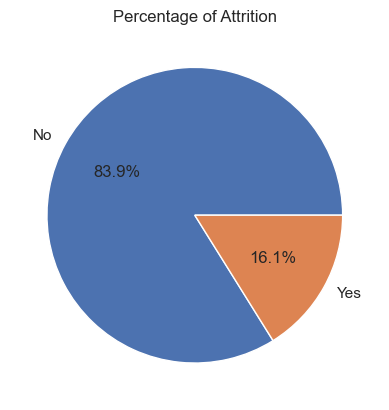

In [10]:
plt.pie(Attrition_count, labels = Attrition_count.index, autopct = '%1.1f%%')
plt.title("Percentage of Attrition")
plt.show()

The analysis indicates an attrition rate of 16.1%, meaning that roughly one in every six employees exited the organization during the observed period.

In [11]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  \
count  1470.000000  1470.000000       1470.000000  1470.000000   
mean     36.923810   802.485714          9.192517     2.912925   
std       9.135373   403.509100          8.106864     1.024165   
min      18.000000   102.000000          1.000000     1.000000   
25%      30.000000   465.000000          2.000000     2.000000   
50%      36.000000   802.000000          7.000000     3.000000   
75%      43.000000  1157.000000         14.000000     4.000000   
max      60.000000  1499.000000         29.000000     5.000000   

       EnvironmentSatisfaction   HourlyRate  JobInvolvement     JobLevel  \
count              1470.000000  1470.000000     1470.000000  1470.000000   
mean                  2.721769    65.891156        2.729932     2.063946   
std                   1.093082    20.329428        0.711561     1.106940   
min                   1.000000    30.000000        1.000000     1.000000   
25%                   2.000000    48.000000        2.000000     1.000000   
50%                   3.000000    66.000000        3.000000     2.000000   
75%                   4.000000    83.750000        3.000000     3.000000   
max                   4.000000   100.000000        4.000000     5.000000   

       JobSatisfaction  MonthlyIncome  ...  PerformanceRating  \
count      1470.000000    1470.000000  ...        1470.000000   
mean          2.728571    6502.931293  ...           3.153741   
std           1.102846    4707.956783  ...           0.360824   
min           1.000000    1009.000000  ...           3.000000   
25%           2.000000    2911.000000  ...           3.000000   
50%           3.000000    4919.000000  ...           3.000000   
75%           4.000000    8379.000000  ...           3.000000   
max           4.000000   19999.000000  ...           4.000000   

       RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
count               1470.000000       1470.000000        1470.000000   
mean                   2.712245          0.793878          11.279592   
std                    1.081209          0.852077           7.780782   
min                    1.000000          0.000000           0.000000   
25%                    2.000000          0.000000           6.000000   
50%                    3.000000          1.000000          10.000000   
75%                    4.000000          1.000000          15.000000   
max                    4.000000          3.000000          40.000000   

       TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
count            1470.000000      1470.000000     1470.000000   
mean                2.799320         2.761224        7.008163   
std                 1.289271         0.706476        6.126525   
min                 0.000000         1.000000        0.000000   
25%                 2.000000         2.000000        3.000000   
50%                 3.000000         3.000000        5.000000   
75%                 3.000000         3.000000        9.000000   
max                 6.000000         4.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000  

[8 rows x 23 columns]

In [12]:
corr = df.corr(numeric_only = True)

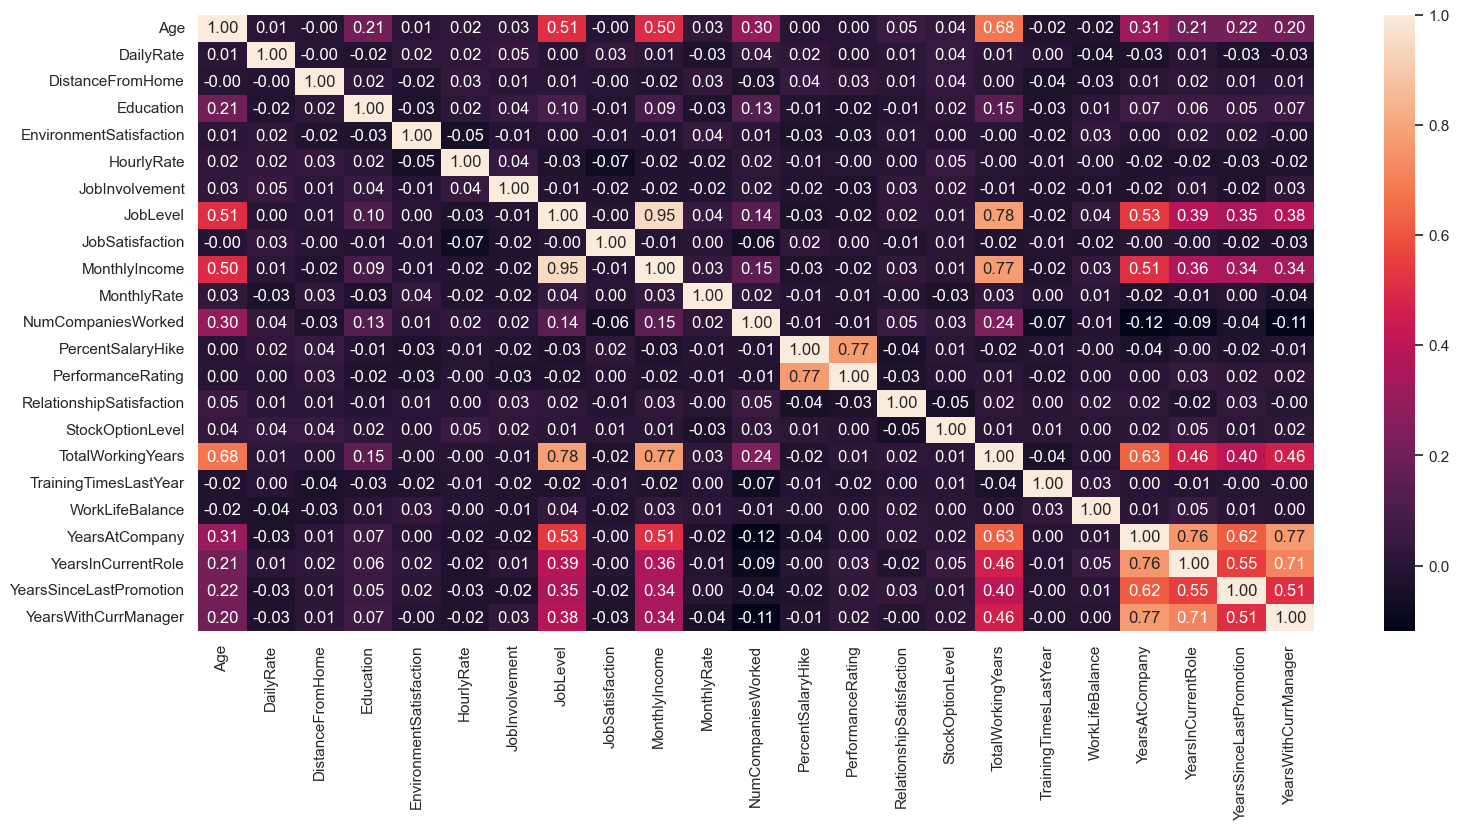

In [65]:
plt.figure(figsize = (18,8))
sns.heatmap(corr, annot = True, fmt = '.2f')
plt.show()

 The analysis reveals strong positive correlations among several key career-related variables. Specifically, Years at Company, Years in Current Role, Years Since Last Promotion, and Years with Current Manager are closely interrelated, suggesting that long-tenured employees often remain in the same role, experience fewer promotions, and work under the same manager for extended periods. Additionally, Job Level and Monthly Income are strongly correlated with Total Working Years, indicating that career progression and compensation are closely tied to overall experience. Collectively, these patterns highlight a stable but potentially stagnant career path for many employees, where advancement and mobility may be limited over time.

Attrition Vs Age

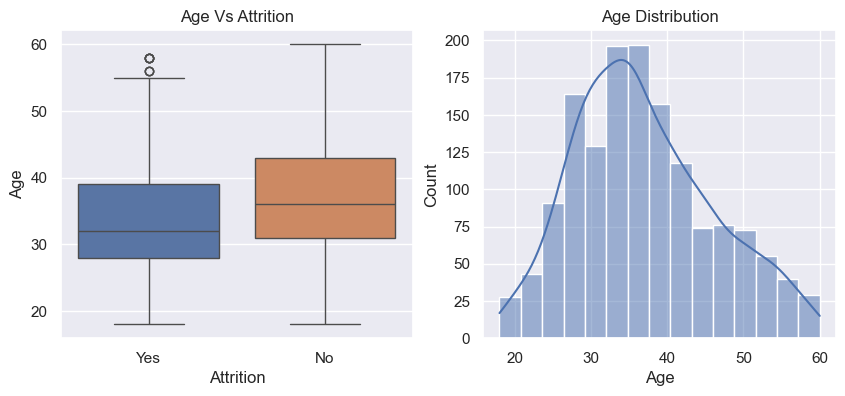

In [14]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'Age', hue = 'Attrition' )
plt.title("Age Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Age")


plt.subplot(1,2,2)
sns.histplot(df["Age"],bins = 15 , kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

1.Employees above the age of 40 show minimal or no attrition, suggesting higher retention among older, possibly more settled or tenured staff.
2.The age distribution reveals that most employees are between 30 and 40 years old, suggesting that the organization primarily consists of experienced, mid-career professionals.

Attrition vs Gender

In [15]:
Gender_count = df['Gender'].value_counts().reset_index(name = 'count')

In [16]:
Gender_count

Gender  count
0    Male    882
1  Female    588

In [41]:
gender_counts = df.groupby('Gender')['Attrition'].value_counts().unstack()
gender_counts['Attrition_rate'] = (gender_counts['Yes']/gender_counts.sum(axis = 1))*100
gender_counts['Attrition_rate']

Gender
Female    14.795918
Male      17.006803
Name: Attrition_rate, dtype: float64

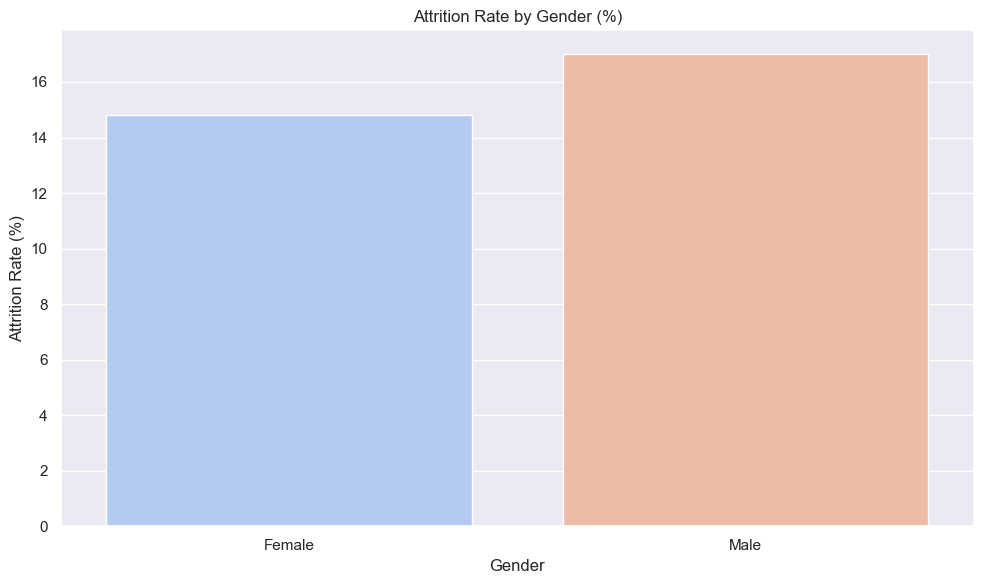

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(x=gender_counts.index, y=gender_counts['Attrition_rate'], palette='coolwarm')
plt.title("Attrition Rate by Gender (%)")
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()

Gender-wise Attrition: Key Insight
The analysis indicates that male employees exhibit a higher attrition rate compared to their female counterparts.
This trend suggests a need to explore role expectations, work conditions, or external factors that may be contributing to increased turnover among male staff.

Attrition Vs JobRole

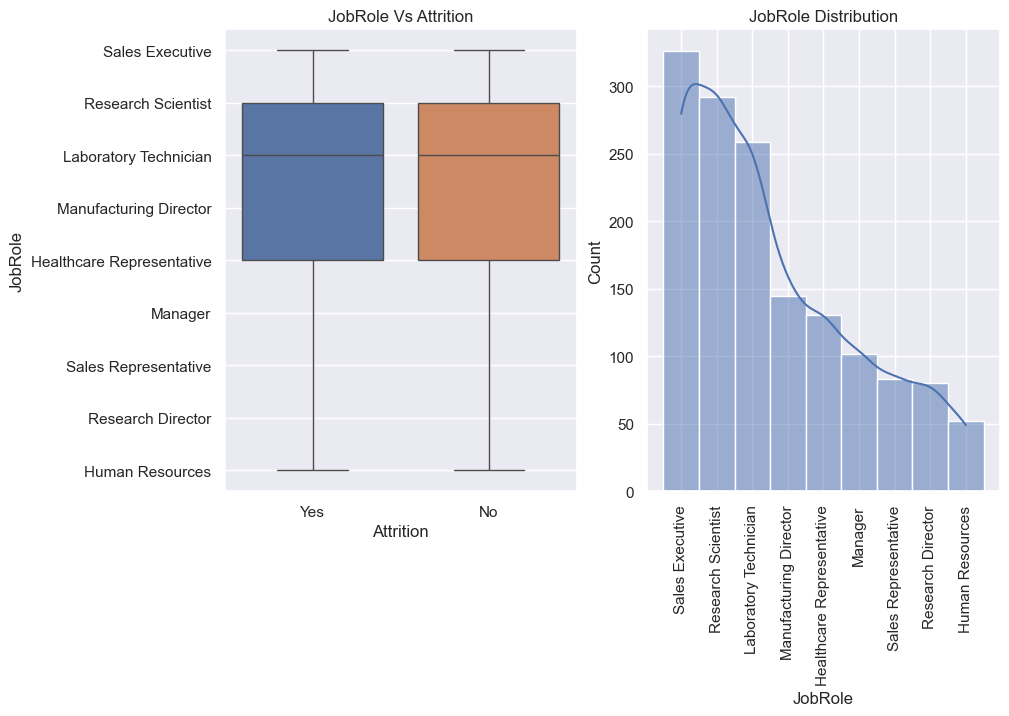

In [29]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'JobRole', hue = 'Attrition' )
plt.title("JobRole Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("JobRole")


plt.subplot(1,2,2)
sns.histplot(df["JobRole"],bins = 15 , kde = True)
plt.title("JobRole Distribution")
plt.xlabel("JobRole")
plt.ylabel("Count")
plt.xticks(rotation = 90)
plt.show()

From the boxplot, I can concluse that Both attrition groups (Yes and No) show similar spread in job roles.
Median JobRole values (numerically encoded) are roughly the same, indicating no drastic skew in attrition for a specific job role.
From the histplot, I can say that workforce is concentrated in a few roles like Sales Executive, Research Scientist, and Lab Technicians.
Recommend creating a bar chart of attrition rate by job role to find roles with the highest % of employees leaving.

In [24]:
job_count = df.groupby('JobRole')['Attrition'].value_counts().unstack()
job_count['Attrition_rate'] = (job_count['Yes']/job_count.sum(axis = 1))*100
job_count['Attrition_rate']

JobRole
Healthcare Representative     6.870229
Human Resources              23.076923
Laboratory Technician        23.938224
Manager                       4.901961
Manufacturing Director        6.896552
Research Director             2.500000
Research Scientist           16.095890
Sales Executive              17.484663
Sales Representative         39.759036
Name: Attrition_rate, dtype: float64

In [25]:
job_count = job_count.sort_values(by = 'Attrition_rate', ascending = False)

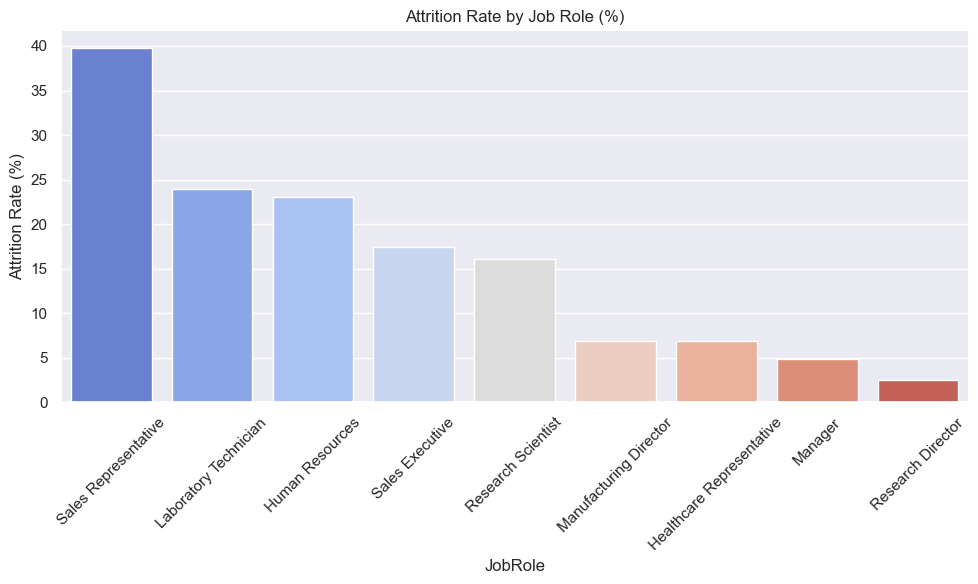

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x=job_count.index, y=job_count['Attrition_rate'], palette='coolwarm')
plt.title("Attrition Rate by Job Role (%)")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Attrition Rate by Job Role: Key Insights

The analysis revealed that roles such as Human Resources and Sales Representative have the highest attrition rates, despite having smaller overall headcounts.

Conversely, Research Directors and Managers show the lowest attrition rates, suggesting higher role stability.

The Sales Executive role, which has the largest number of employees, maintains a moderate attrition rate, indicating it’s a strategic area to monitor closely.

Targeted retention strategies should be considered for high-risk roles with rising attrition, especially in customer-facing and entry-level positions.

Attrition Vs Department

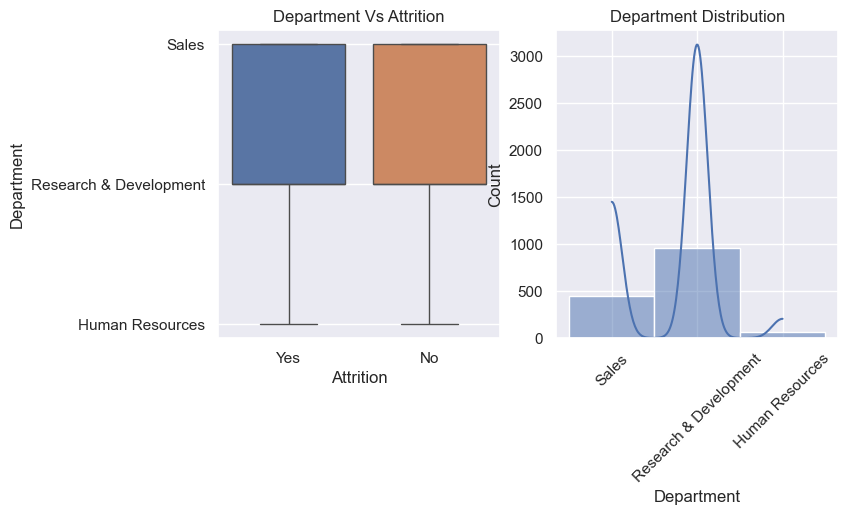

In [35]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'Department', hue = 'Attrition' )
plt.title("Department Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Department")


plt.subplot(1,2,2)
sns.histplot(df["Department"],bins = 15 , kde = True)
plt.title("Department Distribution")
plt.xlabel("Department")
plt.ylabel("Count")
plt.xticks(rotation = 45)
plt.show()

From the boxplot, I can concluse that Both attrition groups (Yes and No) show similar spread in job roles.
From the histplot, I can say that workforce is concentrated in research & development and then in sales.
Recommend creating a bar chart of attrition rate by Department to find roles with the highest % of employees leaving.

In [40]:
department_count = df.groupby('Department')['Attrition'].value_counts().unstack()
department_count['Attrition_rate'] = (department_count['Yes']/department_count.sum(axis = 1))*100
department_count['Attrition_rate']

Department
Human Resources           19.047619
Research & Development    13.839750
Sales                     20.627803
Name: Attrition_rate, dtype: float64

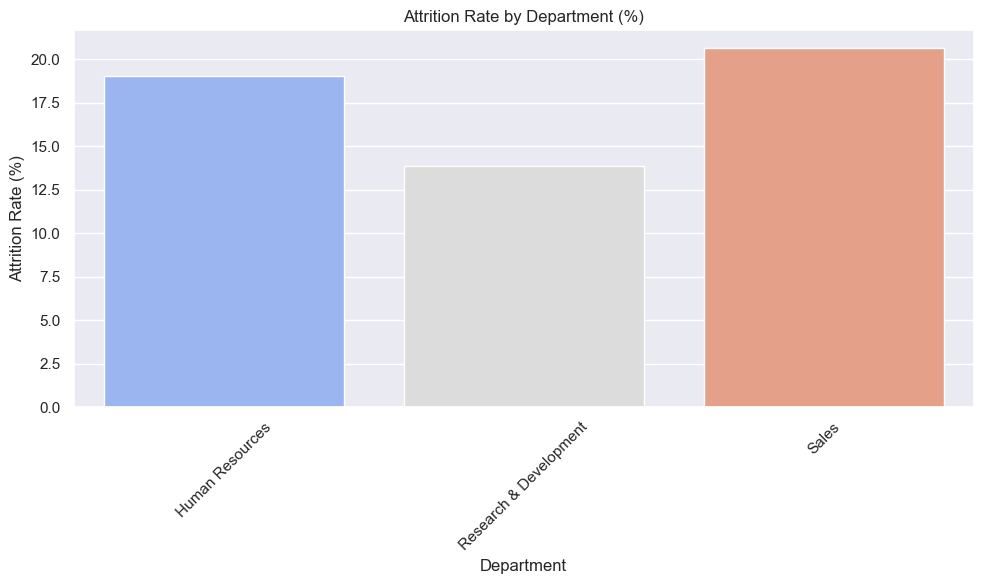

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=department_count.index, y=department_count['Attrition_rate'], palette='coolwarm')
plt.title("Attrition Rate by Department (%)")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Attrition Rate by Department: Key Insights

The analysis revealed that department such as Sales and Human Resources  have the highest attrition rates, despite having smaller overall headcounts.

Conversely, Research & Development show the lowest attrition rates, suggesting higher stability in this department.

The Sales Department, which has the largest number of employees, maintains a moderate attrition rate, indicating it’s a strategic area to monitor closely.

To address attrition effectively, it is recommended to implement targeted retention efforts in departments with elevated risk — particularly those involving client-facing or junior roles, which tend to show higher turnover.

Attrition Vs DistanceFromHome

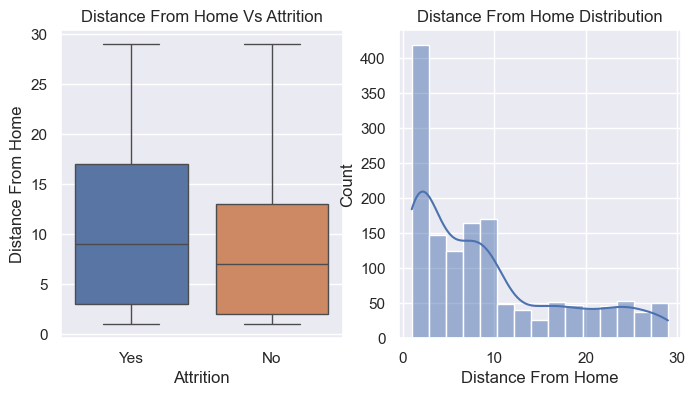

In [53]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'DistanceFromHome', hue = 'Attrition' )
plt.title("Distance From Home Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance From Home")


plt.subplot(1,2,2)
sns.histplot(df["DistanceFromHome"],bins = 15 , kde = True)
plt.title("Distance From Home Distribution")
plt.xlabel("Distance From Home")
plt.ylabel("Count")
plt.show()

Distance from Home: Key Insights
 Left Chart: Distance From Home vs Attrition (Boxplot)
Employees who left the company (Attrition = Yes) have a higher median distance from home compared to those who stayed.

The distribution for the "Yes" group is wider, suggesting that those who live farther from work are more likely to leave.

This implies a possible correlation between long commute distances and employee attrition.

 Right Chart: Overall Distance From Home Distribution
A majority of employees live close to the workplace, mostly within 0–5 km.

However, a small but significant number of employees travel more than 20 km — and they may be contributing more heavily to the attrition pool.

The distribution is right-skewed, meaning most employees are near the office, but a few have substantially longer commutes.



In [46]:
distance_count = df.groupby('DistanceFromHome')['Attrition'].value_counts().unstack()
distance_count['Attrition_rate'] = (distance_count['Yes']/distance_count.sum(axis = 1))*100


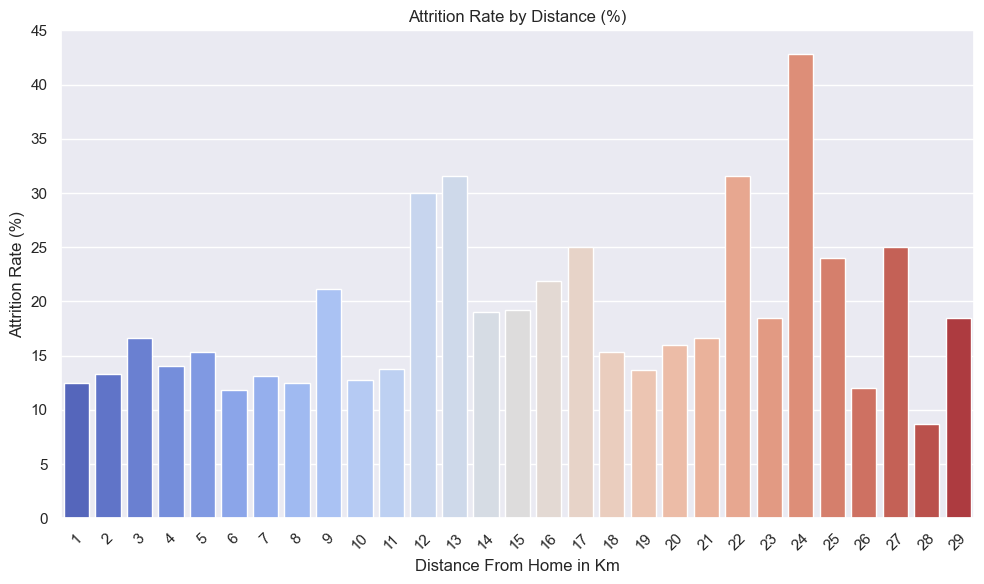

In [52]:
plt.figure(figsize=(10,6))
sns.barplot(x=distance_count.index, y=distance_count['Attrition_rate'], palette='coolwarm')
plt.title("Attrition Rate by Distance (%)")
plt.xlabel("Distance From Home in Km")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The analysis clearly shows a positive correlation between distance from home and attrition rate.
As the commute distance increases, employees are more likely to leave the organization.
This trend suggests that longer travel times may contribute to job dissatisfaction or burnout, making distance a key factor in employee retention.

To improve retention, especially for roles involving lengthy commutes, organizations may consider offering remote work options, flexible hours, or transportation support.

Attrition Vs MonthlyIncome

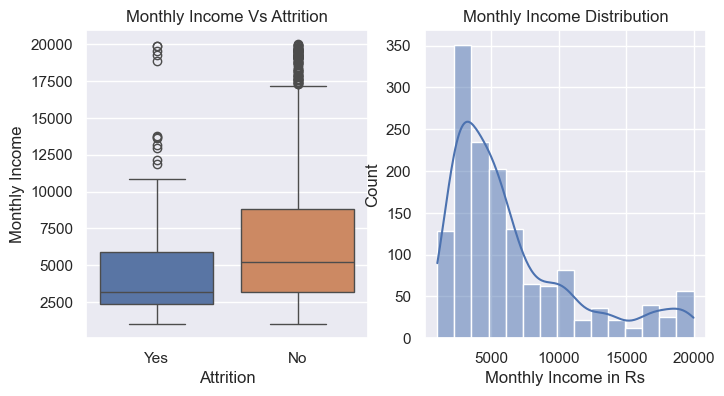

In [55]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'MonthlyIncome', hue = 'Attrition' )
plt.title("Monthly Income Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Monthly Income")


plt.subplot(1,2,2)
sns.histplot(df["MonthlyIncome"],bins = 15 , kde = True)
plt.title("Monthly Income Distribution")
plt.xlabel("Monthly Income in Rs")
plt.ylabel("Count")
plt.show()

The data reveals that a majority of employees fall within the lower salary range, and this group also experiences a notably higher attrition rate.

This pattern suggests that compensation may be a significant factor influencing employee turnover, particularly among lower-paid staff. Employees in these brackets may be more likely to seek better-paying opportunities elsewhere, contributing to increased attrition.

To mitigate this, organizations could consider:

Reevaluating compensation structures, especially for entry-level roles.

Introducing performance-based incentives or benefits to enhance job satisfaction and retention.



Attrition Vs JobSatisfaction

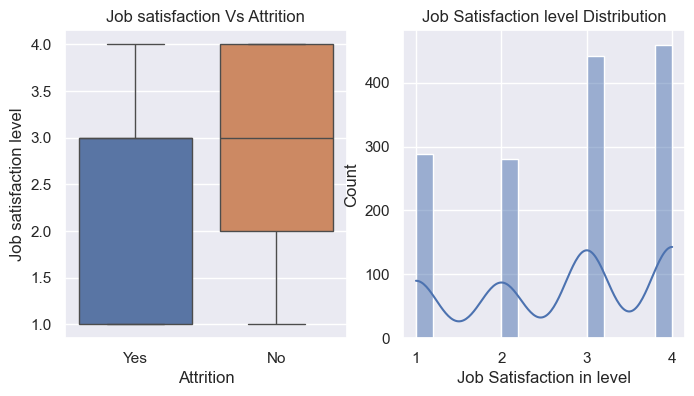

In [57]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'Attrition' )
plt.title("Job satisfaction Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Job satisfaction level")


plt.subplot(1,2,2)
sns.histplot(df["JobSatisfaction"],bins = 15 , kde = True)
plt.title("Job Satisfaction level Distribution")
plt.xlabel("Job Satisfaction in level")
plt.ylabel("Count")
plt.show()

The boxplot analysis clearly indicates that employees with lower levels of job satisfaction are significantly more likely to leave the organization.

Interestingly, while the majority of employees report high job satisfaction, attrition is predominantly concentrated among those with lower satisfaction scores.

This highlights job satisfaction as a critical driver of retention, and suggests that organizations should prioritize:

Regular feedback mechanisms

Employee engagement initiatives

Career development opportunities

Attrition Vs WorkLifeBalance

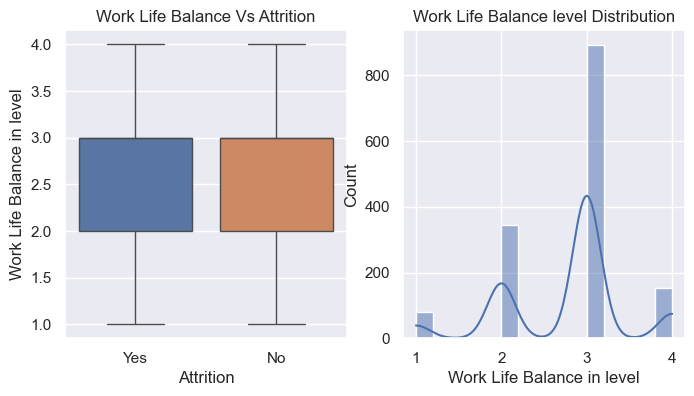

In [58]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'WorkLifeBalance', hue = 'Attrition' )
plt.title("Work Life Balance Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Work Life Balance in level")


plt.subplot(1,2,2)
sns.histplot(df["WorkLifeBalance"],bins = 15 , kde = True)
plt.title("Work Life Balance level Distribution")
plt.xlabel("Work Life Balance in level")
plt.ylabel("Count")
plt.show()

The boxplot shows minimal difference in work-life balance levels between employees who stayed and those who left. This suggests that work-life balance may not be a primary driver of attrition in this dataset — unlike factors such as salary, job satisfaction, or distance from home.

A majority of employees rate their work-life balance at level 3, indicating a generally positive perception across the workforce. Only a small fraction fall into the lowest rating (level 1), with moderate representation at levels 2 and 4.


In [59]:
worklife_count = df.groupby('WorkLifeBalance')['Attrition'].value_counts().unstack()
worklife_count['Attrition_rate'] = (worklife_count['Yes']/worklife_count.sum(axis = 1))*100
worklife_count['Attrition_rate']

WorkLifeBalance
1    31.250000
2    16.860465
3    14.221725
4    17.647059
Name: Attrition_rate, dtype: float64

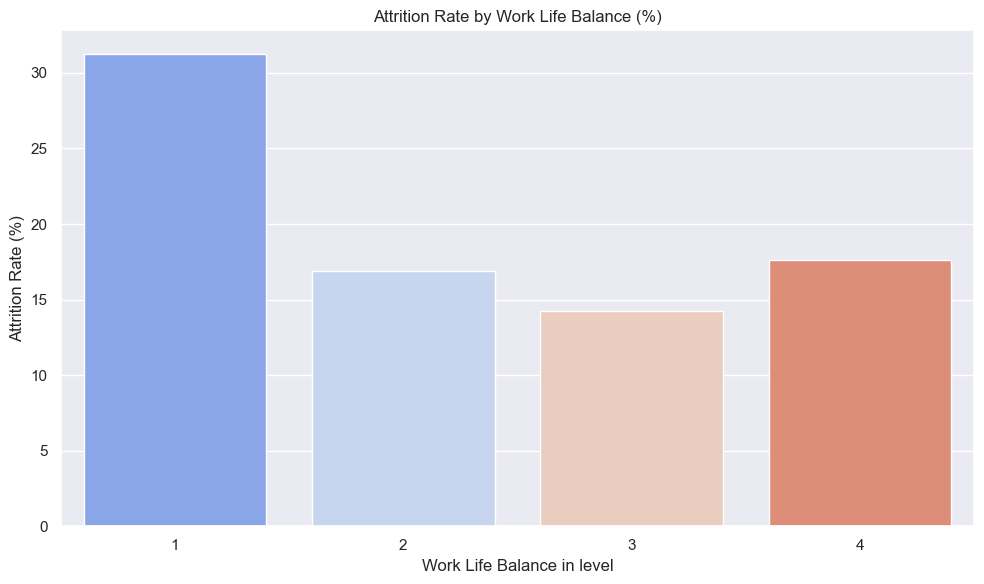

In [61]:
plt.figure(figsize=(10,6))
sns.barplot(x=worklife_count.index, y=worklife_count['Attrition_rate'], palette='coolwarm')
plt.title("Attrition Rate by Work Life Balance (%)")
plt.xlabel("Work Life Balance in level")
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()

The data indicates that employees who rated their Work-Life Balance at the lowest level (Level 1) exhibit a significantly higher attrition rate compared to others.

Although they represent a small portion of the workforce, this group is at elevated risk of leaving the organization, highlighting the critical impact of poor work-life balance on employee retention.

Attrition Vs YearsAtCompany

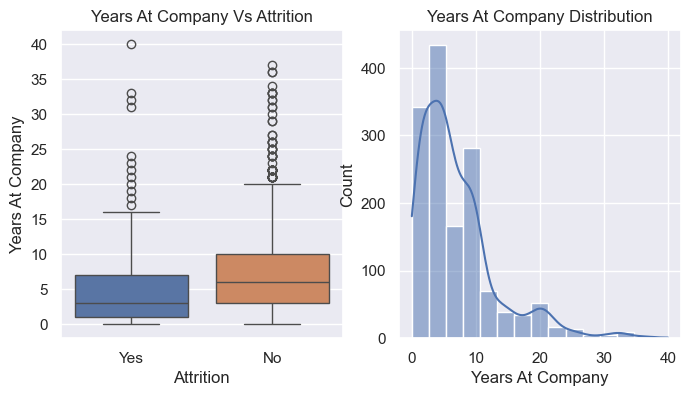

In [62]:
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
sns.boxplot( data = df, x = 'Attrition', y = 'YearsAtCompany', hue = 'Attrition' )
plt.title("Years At Company Vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Years At Company")


plt.subplot(1,2,2)
sns.histplot(df["YearsAtCompany"],bins = 15 , kde = True)
plt.title("Years At Company Distribution")
plt.xlabel("Years At Company")
plt.ylabel("Count")
plt.show()

Employees who left the company typically had shorter tenures, with a median around 3 years, compared to those who stayed, whose median is slightly higher.

The majority of employees have been with the company for less than 10 years, with a sharp drop in headcount after that. The distribution is right-skewed, indicating relatively few long-tenure employees.

In [71]:
df['YearsBin'] = pd.cut(df['YearsAtCompany'], 
                           bins=[0, 5, 10, 15, 20, 25, 30, 34, 40], 
                           labels=['0–5', '6–10', '11–15', '16–20', '21–25', '26–30', '31-35', '36-40'])


In [72]:
years_attrition = df.groupby('YearsBin')['Attrition'].value_counts(normalize=True).unstack()['Yes'] * 100
years_attrition = years_attrition.reset_index(name='AttritionRate')


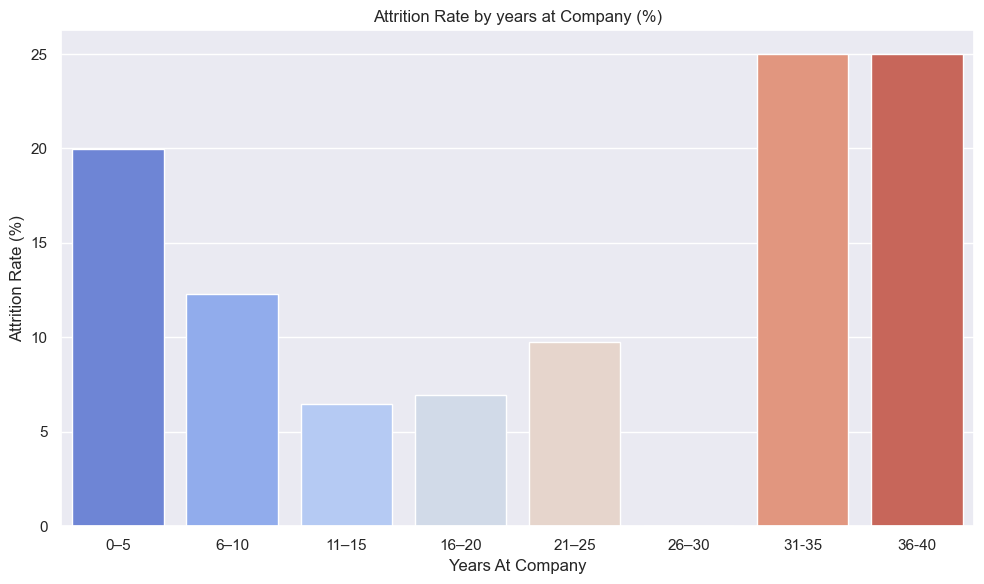

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(data = years_attrition, x = 'YearsBin', y= 'AttritionRate', palette='coolwarm')
plt.title("Attrition Rate by years at Company (%)")
plt.xlabel("Years At Company")
plt.ylabel("Attrition Rate (%)")
plt.tight_layout()
plt.show()

Early attrition (0–5 years) is a critical retention challenge and suggests that new hires may struggle with fit, onboarding, or role expectations.

Employees with 6–25 years of service are less likely to leave, indicating a sweet spot for engagement and loyalty.

The spike in the late-tenure groups could indicate retirement planning, lack of progression, or role fatigue.

